In [1]:
import os

os.environ["CUDA_AVAILABLE_DEVICES"] = "4"

In [2]:
import torch

# use bfloat16 for the entire notebook
torch.autocast("cuda", dtype=torch.bfloat16).__enter__()

# inference mode for the whole notebook
torch.inference_mode().__enter__()

In [11]:
import matplotlib.pyplot as plt
from PIL import Image

import tc

tc.load_models()

image_path = "images/input_2.jpg"

size = (10, 8)
dpi = 150


def plot(image, size=size, dpi=dpi, title=None):
    plt.figure(figsize=size, dpi=dpi)
    plt.imshow(image)
    plt.axis("off")
    if title:
        plt.title(title)
    plt.show()


image = Image.open(image_path)

## Task 1

In [4]:
prompt = ["bottle", "tool", "box"]
task1_image = tc.run_task1(image_path=image_path, prompt=prompt)

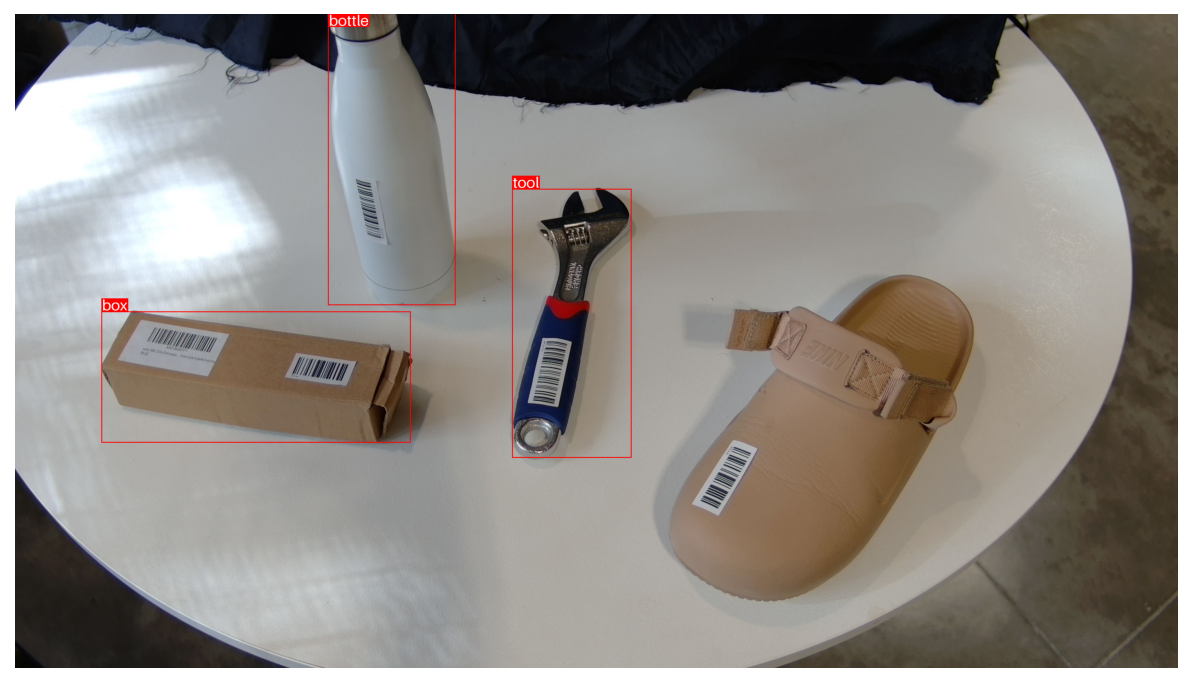

In [5]:
plot(task1_image)

## Task 2

In [6]:
prompt = ["Box", "Slipper"]
prompt = "item"
task2_image = tc.run_task2(image_path=image_path, prompt=prompt)

Marigold predictions...: 100%|██████████| 1/1 [00:00<00:00,  3.02it/s]


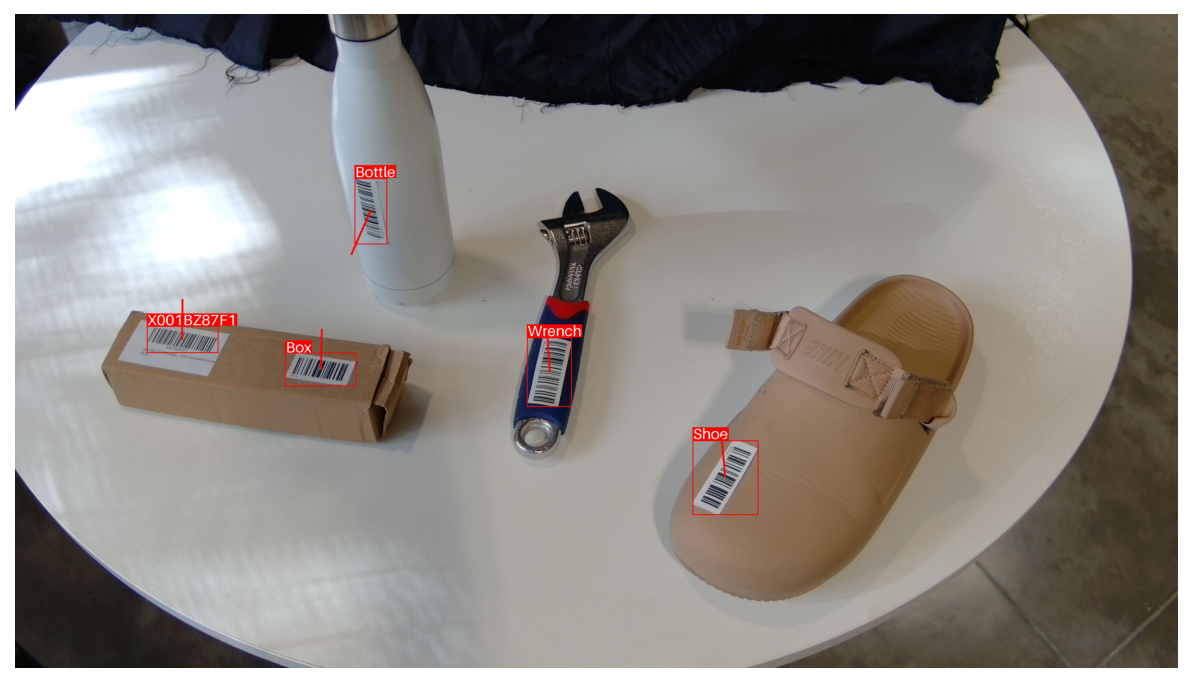

In [ ]:
plot(task2_image)

## Task 3

In [12]:
prompt = "Bottle"
matched_items, matched_barcodes = tc.run_task3(image_path=image_path, prompt=prompt)

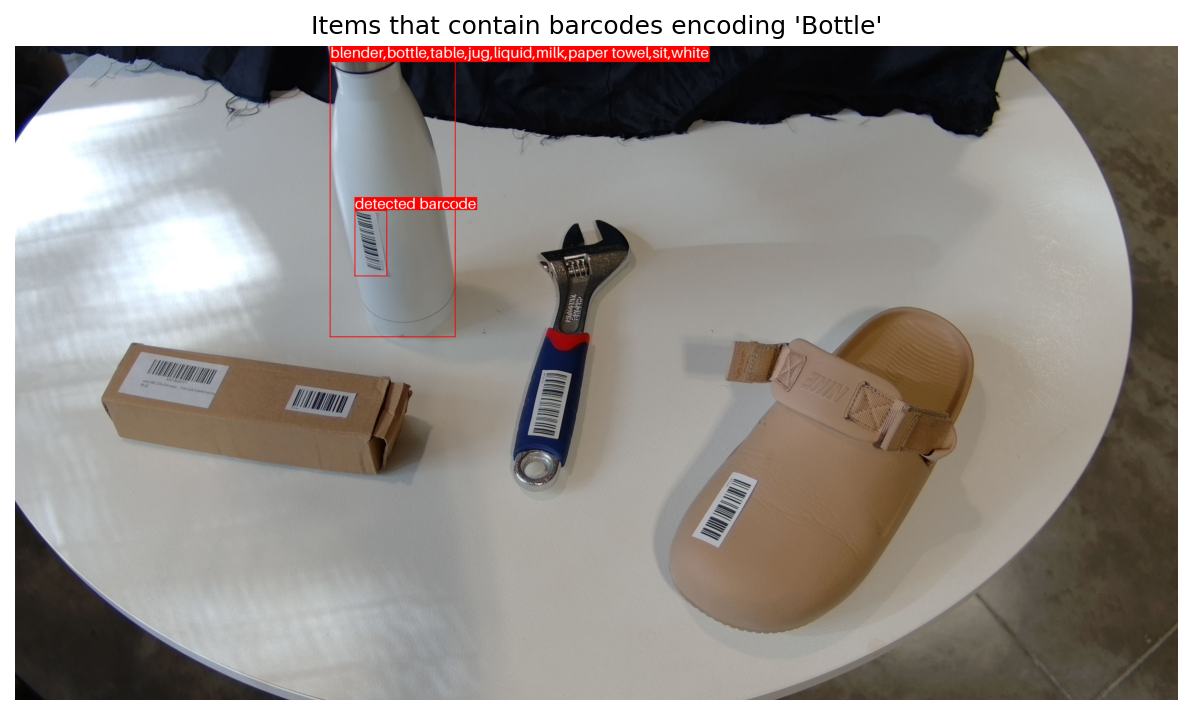

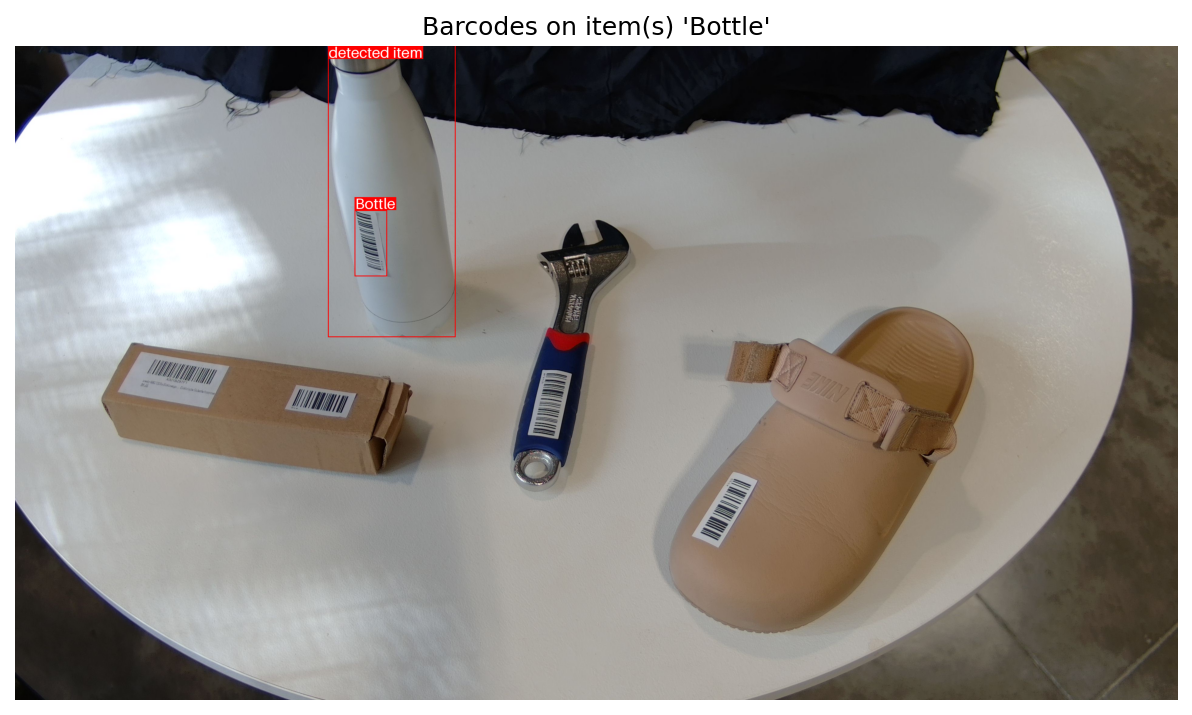

In [13]:
plot(matched_items, title=f"Items that contain barcodes encoding '{prompt}'")
plot(matched_barcodes, title=f"Barcodes on item(s) '{prompt}'")